In [91]:
import pymongo
import pandas as pd
import pprint
import re
import matplotlib.pyplot as plt
from pymongo import MongoClient
import numpy as np
import math

In [4]:
client = MongoClient('localhost', 27017)

In [5]:
db = client['movies']
collection = db['tmdb_5000_movies']
doc_iterator=collection.find()

In [6]:
doc_iterator.count()

C:\Users\jackm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


4803

In [7]:
for doc in collection.find().limit(2):
    pprint.pprint(doc)

{'_id': ObjectId('5d29e82c2f5bfacb0ea74ce5'),
 'budget': 237000000,
 'genres': '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, '
           '{"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science '
           'Fiction"}]',
 'homepage': 'http://www.avatarmovie.com/',
 'id': 19995,
 'keywords': '[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": '
             '"future"}, {"id": 3386, "name": "space war"}, {"id": 3388, '
             '"name": "space colony"}, {"id": 3679, "name": "society"}, {"id": '
             '3801, "name": "space travel"}, {"id": 9685, "name": '
             '"futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, '
             '"name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, '
             '"name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": '
             '10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": '
             '13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, '
     

### Exploratory data analysis

In [8]:
db = client.movies
collection = db.tmdb_5000_movies
org_df = pd.DataFrame(list(collection.find()))
df=org_df
df.head(5)

,_id,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,5d29e82c2f5bfacb0ea74ce5,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,5d29e82c2f5bfacb0ea74ce6,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,5d29e82c2f5bfacb0ea74ce7,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
3,5d29e82c2f5bfacb0ea74ce8,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
4,5d29e82c2f5bfacb0ea74ce9,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [33]:
label = []
for i in df["vote_average"]:
    j=round(int(i),0)
    label.append(j)
    

In [36]:
df["label"]= label

In [37]:
df.isnull().any()

_id                     False
budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average            False
vote_count              False
label                   False
dtype: bool

In [7]:
df.describe()

,budget,id,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000


In [42]:
df.columns

Index(['_id', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'label'],
      dtype='object')

In [46]:
df.loc[:,'budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
5       258000000
6       260000000
7       280000000
8       250000000
9       250000000
10      270000000
11      200000000
12      200000000
13      255000000
14      225000000
15      225000000
16      220000000
17      380000000
18      225000000
19      250000000
20      215000000
21      200000000
22      250000000
23      180000000
24      207000000
25      200000000
26      200000000
27      200000000
28      200000000
29      200000000
          ...    
4773        27000
4774        27000
4775            0
4776            0
4777            0
4778            0
4779            0
4780            0
4781        22000
4782            0
4783            0
4784            0
4785            0
4786            0
4787            0
4788        12000
4789            0
4790            0
4791           13
4792        20000
4793            0
4794            0
4795            0
4796         7000
4797      

In [8]:
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=df.vote_average,y = df.revenue,c="red")
plt.scatter(x=df.vote_average,y = df.revenue,c="blue")
plt.xlabel("vote_average")
plt.ylabel("revenue")

Text(0,0.5,'revenue')

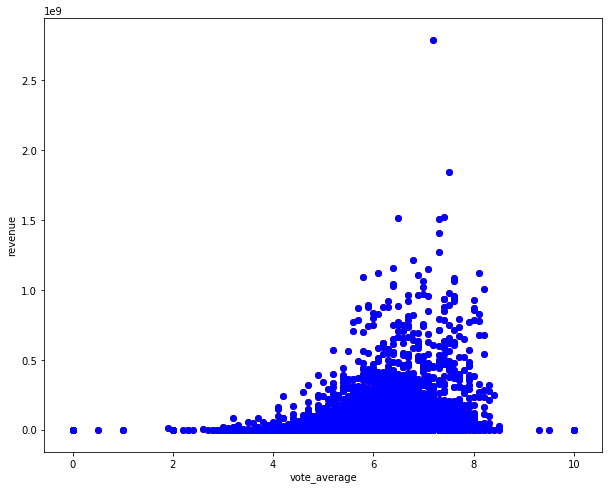

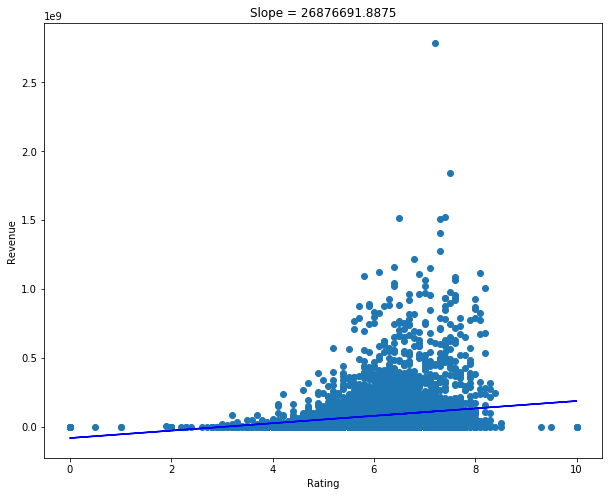

In [9]:
x = np.array(df.vote_average)
y = np.array(df.revenue)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.show()

In [18]:
print(np.corrcoef(x,y))


[[1.         0.19714967]
 [0.19714967 1.        ]]


In [ ]:
Linear regression
Naive bayes
KMeans clustering


### Linear Regression

In [10]:
from sklearn import linear_model as lm 

In [14]:
#creating linear object
linear_reg = lm.LinearRegression()

In [15]:
indep_vars = df.loc[:,['budget','popularity']]

dep_var = df[["revenue"]]

In [16]:
linear_reg.fit(indep_vars , dep_var)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(linear_reg.coef_,linear_reg.intercept_)

[[  2.17519964e+00   1.89298897e+06]] [-21602809.61039671]


In [19]:
print("Revenue = ",round(linear_reg.coef_[0][0],4),"* budget+ ",
      round(linear_reg.coef_[0][1],4),"* popularity ",
      round(linear_reg.intercept_[0],4))

Revenue =  2.1752 * budget+  1892988.9692 * popularity  -21602809.6104


### Naïve Bayes implementation

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB

In [52]:
dataTrain, dataTest, labelTrain, labelTest = train_test_split( df.loc[:,["budget","popularity","revenue"]], df.loc[:,"label"], test_size=0.33, random_state=42)

In [53]:
naive_bayes = GaussianNB()

In [54]:
nb_model = naive_bayes.fit(dataTrain,labelTrain)

In [55]:
predict_test_label =  nb_model.predict(dataTest)

In [56]:
print("Test Accuracy:",100*sum(predict_test_label == labelTest)/len(predict_test_label),"%")

Test Accuracy: 21.8296529968 %


#### Cross validation hold out method

In [60]:
r,c = df.shape

In [65]:
size =  math.floor(2*r/3)

In [66]:
df = df.sample(frac=1)

In [67]:
train_data = df.iloc[:size,:]
test_data = df.iloc[size:,:]

In [69]:
train_features = train_data.loc[:,["budget","popularity","revenue"]]
train_label = train_data.loc[:,"label"]
test_features = test_data.loc[:,["budget","popularity","revenue"]]
Test_label = test_data.loc[:,"label"]

In [70]:
model = naive_bayes.fit(train_features,train_label)

In [71]:
pred_test_label =  model.predict(test_features)

In [72]:
print("Test Accuracy:",100*sum(pred_test_label == Test_label)/len(pred_test_label),"%")

Test Accuracy: 29.1068082448 %


### Random Forest

#### Supervised learning

In [73]:
from sklearn.cluster import KMeans

#### Elbow point method findng optimum no of clusters


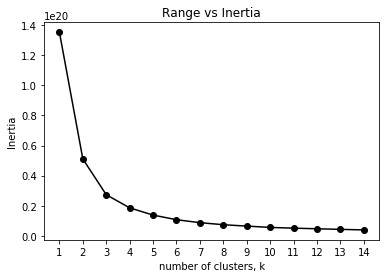

In [74]:
# make a range from 1 to 15
ks = range(1, 15)
inertias = [] # empty list

# for loop to calucate Kmeans for each value
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(df.loc[:,["budget","popularity","revenue"]])    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot Range vs Inertias
plt.plot(ks, inertias, '-o',c="black")
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

# Exlploratory Analysis

# histograms

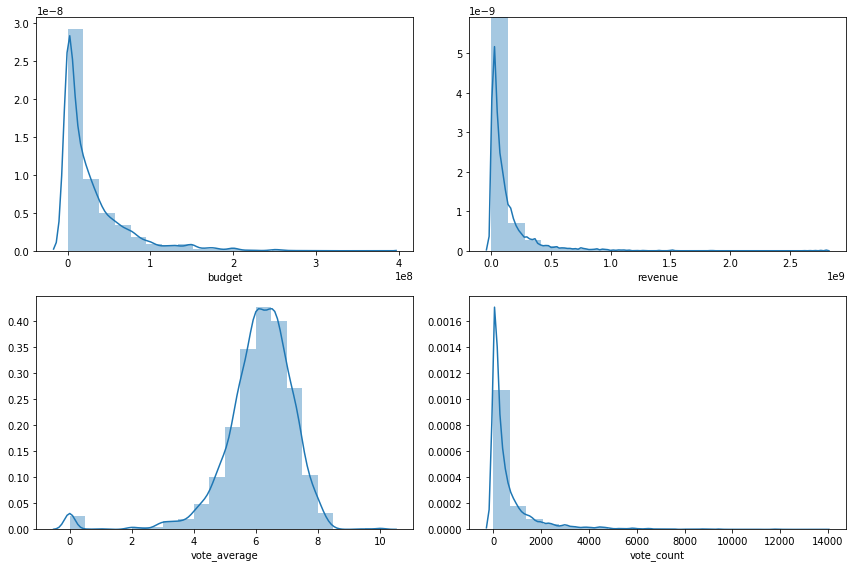

In [22]:
import seaborn as sns
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 8)

m1 = sns.distplot(df.budget, bins=20, ax=axes[0, 0])
m2 = sns.distplot(df.revenue, bins=20, ax=axes[0, 1])
m3 = sns.distplot(df.vote_average, bins=20, ax=axes[1, 0])
m4 = sns.distplot(df.vote_count, bins=20, ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

# Language breakdown

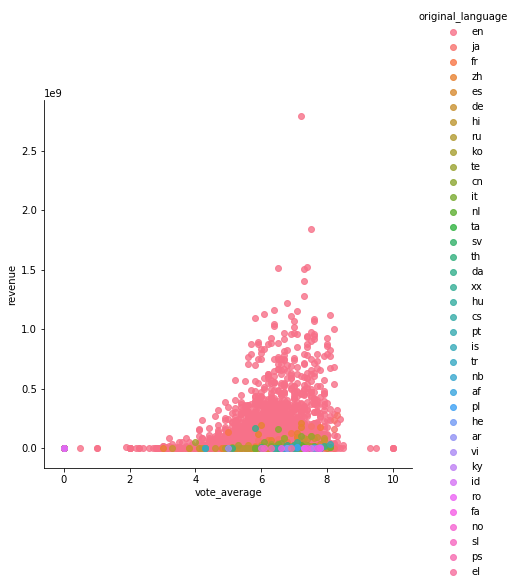

In [26]:
vis1 = sns.lmplot(data=df, x='vote_average', y='revenue', \
                 fit_reg=False, hue='original_language', height=6, aspect=1)

# Start of some analysis where I try to analyze the top 100 movies. i'm trying to bucket the genres with the last code, if anyone wants to take a stab at it, i keep getting errors

In [65]:
df1 = df.sort_values('revenue',ascending = False).head(100)
df1.head(5)


,_id,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,5d29e82c2f5bfacb0ea74ce5,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,5d29e82c2f5bfacb0ea74cfe,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,5d29e82c2f5bfacb0ea74cf5,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,5d29e82c2f5bfacb0ea74d01,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,5d29e82c2f5bfacb0ea74d11,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,...,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176


In [68]:
df2=df1.drop(['homepage','keywords','overview','production_companies','production_countries','spoken_languages','tagline','status'], axis=1)
df2.head(5)

,_id,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,5d29e82c2f5bfacb0ea74ce5,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,2009-12-10,2787965087,162,Avatar,7.2,11800
25,5d29e82c2f5bfacb0ea74cfe,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",597,en,Titanic,100.025899,1997-11-18,1845034188,194,Titanic,7.5,7562
16,5d29e82c2f5bfacb0ea74cf5,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",24428,en,The Avengers,144.448633,2012-04-25,1519557910,143,The Avengers,7.4,11776
28,5d29e82c2f5bfacb0ea74d01,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",135397,en,Jurassic World,418.708552,2015-06-09,1513528810,124,Jurassic World,6.5,8662
44,5d29e82c2f5bfacb0ea74d11,190000000,"[{""id"": 28, ""name"": ""Action""}]",168259,en,Furious 7,102.322217,2015-04-01,1506249360,137,Furious 7,7.3,4176


In [122]:
df2['genres_2'] = pd.np.where(df.genres.str.contains("Action"), "Action_Adventure","other")
df2


ValueError: Length of values does not match length of index